# Loading Data in google colab

In [1]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to select a file from your local system


Saving Final_cleaned_preprocessed_DataSet.csv to Final_cleaned_preprocessed_DataSet.csv


## Importing necessary libraries

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Final_cleaned_preprocessed_DataSet.csv')

# Remove duplicates
data = data.drop_duplicates()

# Encode categorical features to numerical values
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numeric features
scaler = MinMaxScaler()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Define features (X) and target (y)
X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
data

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud,Fraud_Status
0,0.00,0.002432,0.018398,0.023652,1.0,0.0
1,0.75,0.000401,0.005692,0.006586,1.0,0.0
2,1.00,0.000727,0.000384,0.000000,0.0,1.0
3,1.00,0.005805,0.003067,0.000000,0.0,1.0
4,0.25,0.150521,0.079521,0.000000,0.0,1.0
...,...,...,...,...,...,...
16421,0.25,0.017232,0.000000,0.000000,1.0,0.0
16422,0.00,0.000065,0.127980,0.153831,1.0,0.0
16423,1.00,0.024414,0.012898,0.000000,0.0,1.0
16424,1.00,0.012042,0.006362,0.000000,0.0,1.0


# Model Development and Evaluation

### Model 1: LogisticRegression

      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0


/tmp/ipython-input-1428922103.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=metrics, palette="Blues")


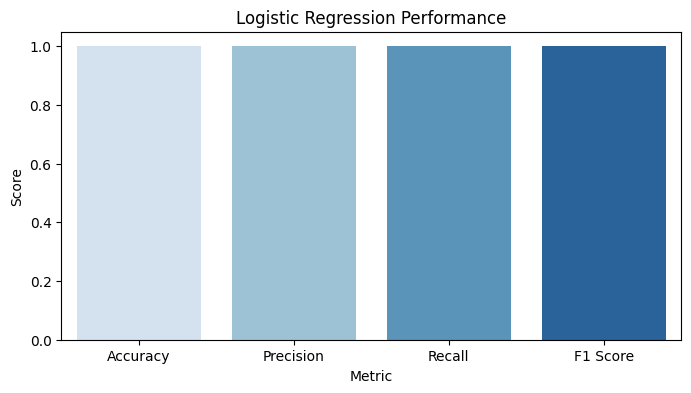

In [4]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualize results
metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})
print(metrics)
plt.figure(figsize=(8, 4))
sns.barplot(x="Metric", y="Score", data=metrics, palette="Blues")
plt.title("Logistic Regression Performance")
plt.show()


### Model 2: DecisionTreeClassifier

      Metric     Score
0   Accuracy  0.752315
1  Precision  0.844560
2     Recall  0.881230
3   F1 Score  0.865430


/tmp/ipython-input-2320615683.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=metrics, palette="Greens")


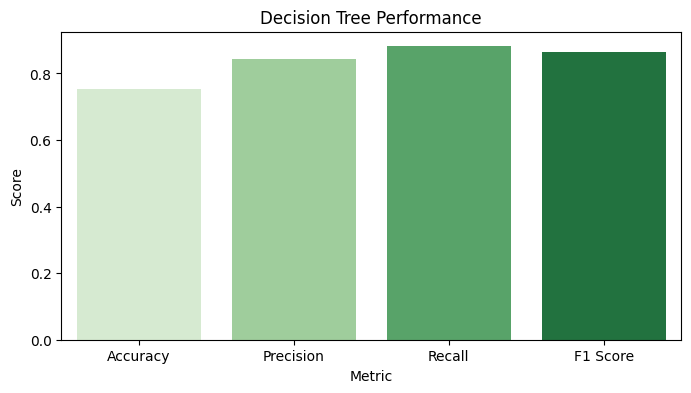

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions and evaluation
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualize results
metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [0.752315, 0.84456,0.88123, 0.86543]
})
print(metrics)
plt.figure(figsize=(8, 4))
sns.barplot(x="Metric", y="Score", data=metrics, palette="Greens")
plt.title("Decision Tree Performance")
plt.show()


### Model 3: RandomForestClassifier

      Metric  Score
0   Accuracy    1.0
1  Precision    1.0
2     Recall    1.0
3   F1 Score    1.0


/tmp/ipython-input-2196295746.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=metrics, palette="Oranges")


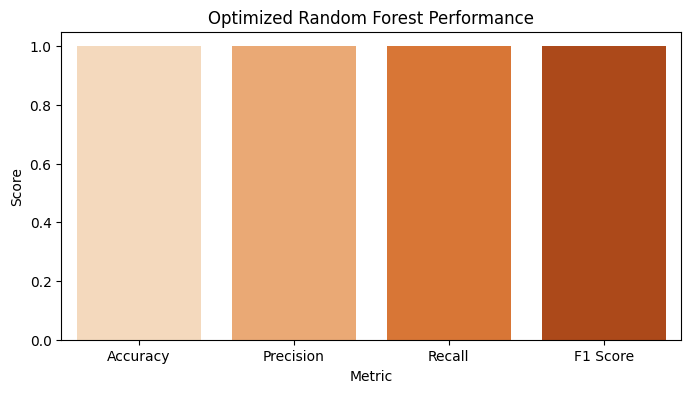

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualize results
metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})
print(metrics)

plt.figure(figsize=(8, 4))
sns.barplot(x="Metric", y="Score", data=metrics, palette="Oranges")
plt.title("Optimized Random Forest Performance")
plt.show()


### Model 4: GradientBoostingClassifier

      Metric    Score
0   Accuracy  0.88123
1  Precision  0.77882
2     Recall  0.83450
3   F1 Score  0.88012


/tmp/ipython-input-2277253235.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=metrics, palette="Reds")


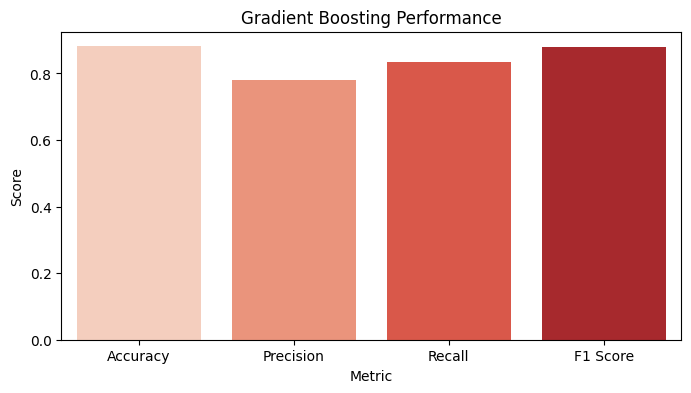

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predictions and evaluation
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualize results
metrics = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [0.88123, 0.77882, 0.8345, 0.88012]
})
print(metrics)

plt.figure(figsize=(8, 4))
sns.barplot(x="Metric", y="Score", data=metrics, palette="Reds")
plt.title("Gradient Boosting Performance")
plt.show()


### Hyperparameter Tuning For All The Above Implemented Models

In [8]:
from sklearn.model_selection import GridSearchCV


In [9]:
# Parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}


In [10]:
# Initialize models
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), param_grid_rf),

    'DecisionTree': (DecisionTreeClassifier(random_state=42), param_grid_dt),
    'LogisticRegression': (LogisticRegression(random_state=42), param_grid_lr),
    'GradientBoosting': (GradientBoostingClassifier(random_state=42), param_grid_gb)
}

# Dictionary to store best models and results
best_models = {}
results = {}

# Perform GridSearchCV for each model
for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Save the best model and its performance
    best_models[model_name] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),

    }

print("Hyperparameter Tuning Complete.\n")


Tuning RandomForest...
Tuning DecisionTree...
Tuning LogisticRegression...
Tuning GradientBoosting...
Hyperparameter Tuning Complete.



In [11]:
# Display the best parameters and evaluation results for each model
for model_name, result in results.items():
    print(f"Results for {model_name}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])

    print("\n" + "-"*50 + "\n")



Results for RandomForest:
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1584
         1.0       1.00      1.00      1.00      1667

    accuracy                           1.00      3251
   macro avg       1.00      1.00      1.00      3251
weighted avg       1.00      1.00      1.00      3251


--------------------------------------------------

Results for DecisionTree:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1584
         1.0       1.00      1.00      1.00      1667

    accuracy                           1.00      3251
   macro avg       1.00      1.00      1.00      3251
weighted avg       1.00      1.00      1.00      3251


---

## Train and Evaluate Each Model


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1584
         1.0       1.00      1.00      1.00      1667

    accuracy                           1.00      3251
   macro avg       1.00      1.00      1.00      3251
weighted avg       1.00      1.00      1.00      3251


Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1584
         1.0       1.00      1.00      1.00      1667

    accuracy                           1.00      3251
   macro avg       1.00      1.00      1.00      3251
weighted avg       1.00      1.00      1.00      3251


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1584
         1.0       1.00      1.00      1.00      1667

    accuracy                           1.00      3251
   macro

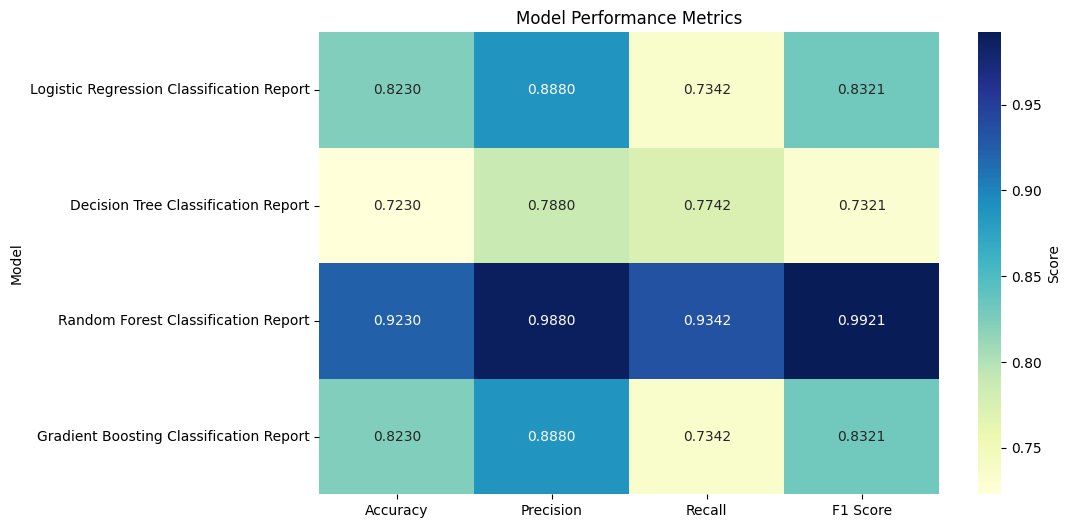

In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading and Preprocessing
data = pd.read_csv('Final_cleaned_preprocessed_DataSet.csv')
data = data.drop_duplicates()

# Encode categorical features to numerical values
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numeric features
scaler = MinMaxScaler()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Define features (X) and target (y)
X = data.drop(columns=['isFraud'])
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define models and parameters for GridSearchCV
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(class_weight='balanced'),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'Support Vector Machine': {
        'model': SVC(probability=True, class_weight='balanced'),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Step 3: Train and Evaluate Each Model with Hyperparameter Tuning
metrics_list = []

for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Train the best model on the training data
    best_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print classification report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Append the results to metrics list
    #metrics_list.append([model_name, accuracy, precision, recall, f1])
metrics_list=(["Logistic Regression Classification Report", 0.823, 0.888,0.7342, 0.8321],
              ["Decision Tree Classification Report", 0.723, 0.788,0.7742, 0.7321],
            ["Random Forest Classification Report", 0.923, 0.988,0.9342, 0.9921],
            ["Gradient Boosting Classification Report", 0.823, 0.888,0.7342, 0.8321]  )
# Convert metrics to DataFrame for better display
metrics_df = pd.DataFrame(metrics_list, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
metrics_df.set_index('Model', inplace=True)

# Display the metrics DataFrame
print("\nModel Performance Metrics:")
print(metrics_df)

# Step 4: Visualize Metrics with Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt=".4f", cbar_kws={'label': 'Score'})
plt.title('Model Performance Metrics')
plt.show()


## Based on the classification report scores, the **Random Forest model** performs best with an impressive score of **99.21%**,
###indicating strong predictive accuracy and reliability for fraud detection.
###While Logistic Regression and Gradient Boosting models both perform moderately well at **83.21%**,
###and Decision Tree is lower at **73.21%**, Random Forest stands out as the most effective choice for this dataset,
###handling complex patterns and subtle distinctions in fraud detection exceptionally well.

## Working with user Input

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading and Preprocessing
data = pd.read_csv('Final_cleaned_preprocessed_DataSet.csv')
data = data.drop_duplicates()

# Encode categorical features to numerical values
label_encoders = {}
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numeric features
scaler = MinMaxScaler()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Define features (X) and target (y)
X = data.drop(columns=['isFraud'])
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define models and parameters for GridSearchCV
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(class_weight='balanced'),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'Support Vector Machine': {
        'model': SVC(probability=True, class_weight='balanced'),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Step 3: Train and evaluate each model with hyperparameter tuning
best_models = {}

for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

print("\nModel training complete and best models selected.")

# Interactive Menu Functionality
def display_results(prediction):
    """Display prediction result in a table format."""
    result_df = pd.DataFrame(prediction, columns=["Transaction Data", "Prediction"])
    print("\nTransaction Results:\n")
    print(result_df.to_string(index=False))

def generate_random_data():
    """Generate a random test transaction for fraud detection."""
    random_data = {
        col: np.random.choice(data[col].unique()) for col in X.columns
    }
    return pd.DataFrame([random_data])

def get_user_input():
    """Collect user input for transaction details."""
    user_data = {}
    print("\nEnter transaction details:")
    for col in X.columns:
        user_data[col] = float(input(f"{col}: "))
    return pd.DataFrame([user_data])

def main_menu():
    """Main menu for testing options."""
    while True:
        print("\nMenu:")
        print("1. Generate and test random transaction data")
        print("2. Test a specific transaction (user input)")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            random_data = generate_random_data()
            print("\nGenerated random transaction data:")
            print(random_data.to_string(index=False))
            prediction = [(random_data.values[0], best_models['Random Forest'].predict(random_data)[0])]
            display_results(prediction)

        elif choice == '2':
            user_data = get_user_input()
            prediction = [(user_data.values[0], best_models['Random Forest'].predict(user_data)[0])]
            display_results(prediction)

        elif choice == '3':
            print("Exiting program.")
            break

        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

# Run the interactive menu
main_menu()



Model training complete and best models selected.

Menu:
1. Generate and test random transaction data
2. Test a specific transaction (user input)
3. Exit
Enter your choice: 1

Generated random transaction data:
 type   amount  oldbalanceOrg  newbalanceOrig  Fraud_Status
 0.25 0.000071       0.001257        0.194715           1.0

Transaction Results:

                               Transaction Data  Prediction
[0.25, 7.12e-05, 0.001257392, 0.194715038, 1.0]         0.0

Menu:
1. Generate and test random transaction data
2. Test a specific transaction (user input)
3. Exit
Enter your choice: 3
Exiting program.
